In [2]:
import os
import torch as t
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
print(t.__version__)

2.0.1+cpu


In [4]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
# the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Processing...


C:\Users\princ\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [7]:
# train_len = len(mnist_trainset)
# test_len = len(mnist_testset)
# print(train_len, test_len)

60000 10000


In [5]:
# the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(28*28, 100) # input layer
        self.linear2 = nn.Linear(100, 50) # hidden layer
        self.final = nn.Linear(50, 10) # output layer
        self.relu = nn.ReLU() # piecewise linear function
    
    # convert + flatten
    def forward(self, img):
        x = img.view(-1, 28*28) # reshape the image for the model
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x

net = Net()

In [6]:
# loss function
cross_en_loss = nn.CrossEntropyLoss()
optimiser = t.optim.Adam(net.parameters(), lr=0.001) # e-1
epoch = 10

for epoch in range(epoch):
    net.train()
    
    for data in train_loader:
        x, y = data # x=features, y=targets
        optimiser.zero_grad() # set gradient to 0 before each loss calc
        output = net(x.view(-1, 28*28)) # pass in reshaped batch
        loss = cross_en_loss(output, y) # cal and grab the loss value
        loss.backward() # apply loss back through the network's parameters
        optimiser.step() # optimise weights to account for loss and gradients


NameError: name 'train_loader' is not defined

In [10]:
# evaluating our dataset
correct = 0
total = 0
with t.no_grad():
    for data in test_loader:
        x, y = data
        output = net(x.view(-1, 784))
        for idx, i in enumerate(output):
            if t.argmax(i) == y[idx]:
                correct += 1
            total += 1
print(f"accuracy: {round(correct/total, 3)}")

accuracy: 0.101


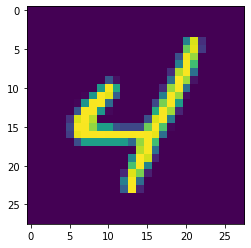

tensor(3)


In [11]:
# visualization
plt.imshow(x[3].view(28, 28))
plt.show()
print(t.argmax(net(x[3].view(-1, 784))[0]))